In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import cv2
import pandas as pd
plt.style.use('ggplot')

In [3]:
#fake_d = '/mnt/data/datasets/rwth-SPADE-train-2022_06_27_16_44_03/train/'
#fake_d = '/mnt/sda2/datasets/ReACGAN-ADC-DiffAug-train-2022_09_02_12_25_29/train/'
fake_d = '/mnt/sda2/old_home/grios/classifier_results/real/rwth-small/rwth-small-ReACGAN-ADC-DiffAug-highcond/train/'
real_d = '/mnt/sda2/datasets/rwth-small/train/'

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

def showImagesHorizontally(real_d, fake_d, n_real, n_fake, classes):
    n_classes = len(classes)
    fig, axs = plt.subplots(n_classes, n_real+n_fake)    
    for i in range(n_classes):
        real_list = os.listdir(os.path.join(real_d,classes[i]))
        fake_list = os.listdir(os.path.join(fake_d,classes[i]))
        for j in range(n_real):
            image = imread(os.path.join(real_d,classes[i],real_list[j]))
            axs[i, j].imshow(image)
            axs[i, j].axis('off')
        for j in range(n_fake):
            image = imread(os.path.join(fake_d,classes[i],fake_list[j]))
            axs[i, j+n_real].imshow(image)
            axs[i, j+n_real].axis('off')

In [ ]:
classes = os.listdir(real_d)
showImagesHorizontally(real_d, fake_d, 2, 5, classes[8:10])

In [8]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

x_a = cv2.resize(imread(os.path.join(real_d,"0","train0.png")), (64,64))
x_b = imread(os.path.join(fake_d,"10","20.png"))
plt.imshow(mixup_data(x_a, x_b)[0])
plt.show()

NameError: name 'real_d' is not defined

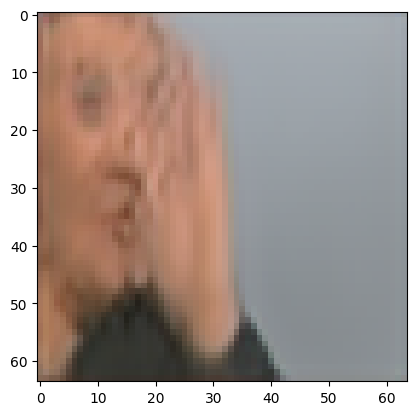

In [24]:
plt.imshow(imread(os.path.join(fake_d,"10","20.png")))
plt.show()

In [2]:
def plot(data):
    # Create x-axis values based on the array length
    x = np.arange(len(data['val']['epoch_acc']))

    # Plot the array of floats
    plt.plot(x, data['val']['epoch_acc'])

    # Add labels and title to the plot
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Array of Floats')

    # Display the plot
    plt.show()

def plotthree(data1, data2, data3, label1, label2, label3):
    plt.rc('font', family='serif')          # controls default text sizes
    clip_min = min([len(data1['val']['epoch_acc']),len(data2['val']['epoch_acc']),len(data3['val']['epoch_acc'])])
    data1 = data1['val']['epoch_acc'][:clip_min]
    data2 = data2['val']['epoch_acc'][:clip_min]
    data3 = data3['val']['epoch_acc'][:clip_min]
    
    plt.plot(np.arange(clip_min), data1, color='red', label=label1)
    plt.plot(np.arange(clip_min), data2, color='green', label=label2)
    plt.plot(np.arange(clip_min), data3, color='blue', label=label3)

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

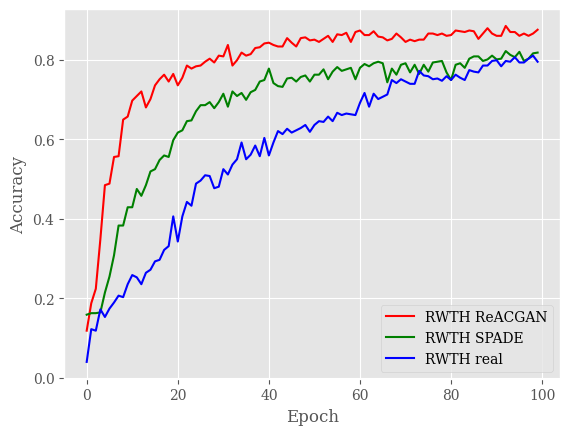

In [3]:
data1 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/gen/RWTH-ReACGAN-ADC-DiffAug/train_results.pkl')
data2 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/gen/rwth-SPADE/train_results.pkl')
data3 = pd.read_pickle(r'./classifier_results/real/rwth/train_results.pkl')
plotthree(data1, data2, data3, 'RWTH ReACGAN', 'RWTH SPADE', 'RWTH real')

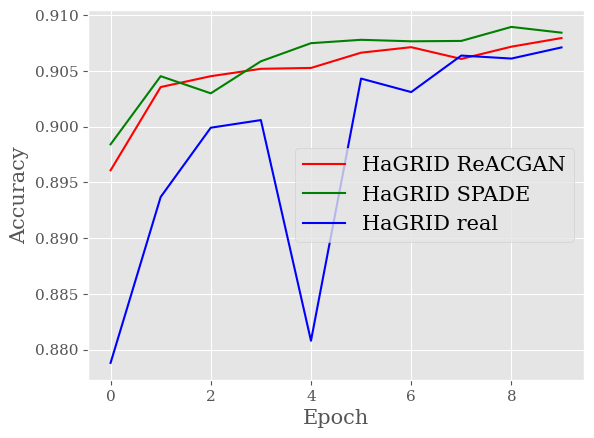

In [32]:
data1 = pd.read_pickle(r'/home/grios/TrainingDataGeneration/classifier_results/gen/hagrid-complete-ReACGAN-ADC-DiffAug-train-2022_10_28_03_00_38/train_results.pkl')
data2 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/gen/hagrid-complete-SPADE/train_results.pkl')
data3 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/real/hagrid-complete/train_results.pkl')
plotthree(data1, data2, data3, 'HaGRID ReACGAN', 'HaGRID SPADE', 'HaGRID real')

In [175]:
data1 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/gen/hagrid-ReACGAN-ADC-DiffAug-20/train_results.pkl')
data2 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/real/hagrid-20/train_results.pkl')
plottwo(data1, data2, 'hagrid-20 ReACGAN', 'hagrid-20 real')

NameError: name 'plottwo' is not defined

In [172]:
data1 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/gen/hagrid-ReACGAN-ADC-DiffAug-10/train_results.pkl')
data2 = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/real/hagrid-10/train_results.pkl')
plottwo(data1, data2, 'hagrid-10 ReACGAN', 'hagrid-10 real')

NameError: name 'plottwo' is not defined

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('./src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from data_util import Dataset_
from torch.utils.data import DataLoader


/home/grios/myphyton/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
train_dataset = Dataset_(data_name='hagrid',
                        data_dir='/mnt/sda2/datasets/hagrid-complete/',
                        train=True,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path='/mnt/sda2/datasets/hagrid-complete/hagrid-complete_64_pose_skeleton_train.hdf5',
                        normalize=True,
                        load_data_in_memory=False,
                        pose=True,
                        skeleton=True)
train_dataloader = DataLoader(dataset=train_dataset,
                            batch_size=64,
                            shuffle=False,
                            pin_memory=False,
                            num_workers=4,
                            sampler=None,
                            drop_last=False)

NameError: name 'Dataset_' is not defined

In [16]:
eval_dataset = Dataset_(data_name='hagrid',
                        data_dir='/mnt/sda2/datasets/static-sl/hagrid-complete/',
                        train=False,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path=None,
                        normalize=True,
                        load_data_in_memory=False,
                        pose=True,
                        skeleton=True)
eval_dataloader = DataLoader(dataset=eval_dataset,
                            batch_size=64,
                            shuffle=False,
                            pin_memory=False,
                            num_workers=4,
                            sampler=None,
                            drop_last=False)

/tmp/ipykernel_14782/3659516750.py:176: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  self.trsf_list += [transforms.Resize(resize_size, Image.LANCZOS)]


In [3]:
iterator = iter(train_dataloader)
iterator.next()

NameError: name 'train_dataloader' is not defined

In [18]:
iterator = iter(eval_dataloader)
iterator.next()

[tensor([[[[ 0.0667,  0.0667,  0.0588,  ..., -0.1137, -0.1216, -0.1216],
           [ 0.0667,  0.0667,  0.0588,  ..., -0.1137, -0.1216, -0.1216],
           [ 0.0667,  0.0667,  0.0667,  ..., -0.1137, -0.1216, -0.1216],
           ...,
           [ 0.0275,  0.0275,  0.0275,  ..., -0.1529, -0.1608, -0.1765],
           [ 0.0275,  0.0275,  0.0275,  ..., -0.1608, -0.1686, -0.1765],
           [ 0.0275,  0.0275,  0.0275,  ..., -0.1686, -0.1765, -0.1765]],
 
          [[ 0.0510,  0.0510,  0.0431,  ..., -0.1686, -0.1765, -0.1765],
           [ 0.0510,  0.0510,  0.0431,  ..., -0.1686, -0.1765, -0.1765],
           [ 0.0510,  0.0510,  0.0510,  ..., -0.1686, -0.1765, -0.1765],
           ...,
           [ 0.0039,  0.0039,  0.0118,  ..., -0.2078, -0.2157, -0.2314],
           [ 0.0039,  0.0039,  0.0118,  ..., -0.2157, -0.2235, -0.2314],
           [ 0.0039,  0.0039,  0.0118,  ..., -0.2235, -0.2314, -0.2314]],
 
          [[-0.0510, -0.0510, -0.0588,  ..., -0.2941, -0.3020, -0.3020],
           [-

In [19]:
eval_dataset[0][2]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


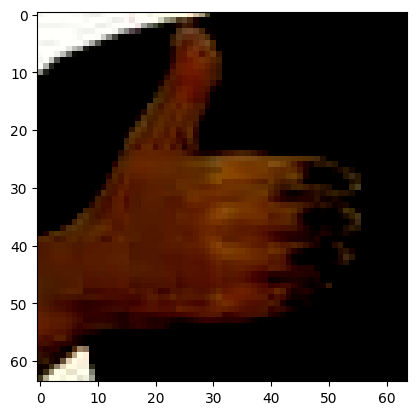

In [17]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import numpy as np

plt.imshow(np.transpose(eval_dataset[410][0], (1,2,0)))
plt.show()

In [18]:
eval_dataset[0][2].shape

torch.Size([20, 64, 64])

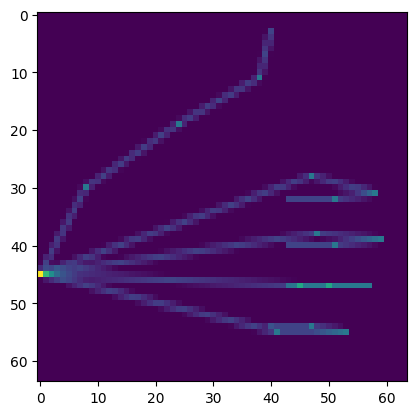

In [19]:
plt.imshow(np.sum(np.transpose(eval_dataset[410][2].numpy(), (1,2,0)),2))
plt.show()

In [ ]:
400, 800 al revez
600,1000 bien

In [9]:
import numpy as np
isinstance(eval_dataset[0][2],np.ndarray)

True

In [4]:
# PyTorch StudioGAN: https://github.com/POSTECH-CVLab/PyTorch-StudioGAN
# The MIT License (MIT)
# See license file or visit https://github.com/POSTECH-CVLab/PyTorch-StudioGAN for details

# src/data_util.py

import os
import random

from torch.utils.data import Dataset
from torchvision.datasets import CIFAR10, CIFAR100
from torchvision.datasets import ImageFolder
from scipy import io
from PIL import ImageOps, Image
import torch
import torchvision.transforms as transforms
import h5py as h5
import numpy as np
import json
from scipy.stats import multivariate_normal
import cv2
from skimage.draw import line_aa

class RandomCropLongEdge(object):
    """
    this code is borrowed from https://github.com/ajbrock/BigGAN-PyTorch
    MIT License
    Copyright (c) 2019 Andy Brock
    """
    def __call__(self, img):
        size = (min(img.size), min(img.size))
        # Only step forward along this edge if it's the long edge
        i = (0 if size[0] == img.size[0] else np.random.randint(low=0, high=img.size[0] - size[0]))
        j = (0 if size[1] == img.size[1] else np.random.randint(low=0, high=img.size[1] - size[1]))
        return transforms.functional.crop(img, j, i, size[0], size[1])

    def __repr__(self):
        return self.__class__.__name__

class PoseFolder(Dataset):
    def __init__(self, data_dir, shapes, skeleton, transform = None):
        self.data_dir = data_dir
        self.samples = self.make_dataset()
        self.shapes = shapes
        self.transform = transform
        self.skeleton = skeleton
        self.n_keypoints = 20 if self.skeleton else 21 

    def make_dataset(self):    
        instances = []
        _, class_to_idx = self.find_classes(self.data_dir)
        for target_class in sorted(class_to_idx.keys()):
            target_dir = os.path.join(self.data_dir, target_class)
            for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                for fname in sorted(fnames):
                    instances.append(os.path.join(root, fname))
        return instances

    def loader(self, path, shape):
        f = open(path)
        pose = json.load(f)
        f.close()
        if len(pose['people']) > 0 and (sum([pose['people'][0]['hand_right_keypoints_2d'][i] for i in range(2,len(pose['people'][0]['hand_right_keypoints_2d']),3)]) > 0 or 
                                        sum([pose['people'][0]['hand_left_keypoints_2d'][i] for i in range(2,len(pose['people'][0]['hand_left_keypoints_2d']),3)]) > 0):
            rh_keypoints = pose['people'][0]['hand_right_keypoints_2d']
            lh_keypoints = pose['people'][0]['hand_left_keypoints_2d']
            if sum([rh_keypoints[i] for i in range(2,len(rh_keypoints),3)]) >= sum([lh_keypoints[i] for i in range(2,len(lh_keypoints),3)]):
                return self.load_keypoints(rh_keypoints, shape)
            else:
                return self.load_keypoints(lh_keypoints, shape)
        else:
            return torch.zeros((self.n_keypoints, shape[1], shape[0]))

    def load_keypoints(self, keypoints, shape):
        if self.skeleton:
            sample = np.zeros((self.n_keypoints, shape[1], shape[0]))
            for i in range(5):
                x0 = np.clip(int(keypoints[0]), 0, shape[0]-1)
                y0 = np.clip(int(keypoints[1]), 0, shape[1]-1)
                for j in range(1,5):
                    x1 = np.clip(int(keypoints[(i*4+j)*3]), 0, shape[0]-1)
                    y1 = np.clip(int(keypoints[(i*4+j)*3+1]), 0, shape[1]-1)
                    rr, cc, val = line_aa(y0, x0, y1, x1)
                    sample[i*4+j-1, rr, cc] = val
                    x0 = x1
                    y0 = y1
            return torch.tensor(sample).float()
        else:
            x, y = np.mgrid[0:shape[0]:1, 0:shape[1]:1]
            pos = np.dstack((x, y))
            sample = torch.zeros((self.n_keypoints, shape[1], shape[0]))
            for i in range(self.n_keypoints):
                kx = shape[0]-keypoints[i*3]
                ky = keypoints[i*3+1]
                # confidence = np.clip(keypoints[i*3+2], 0, 1)
                # shape[1]-shape[1]*confidence+1 | shape[0]-shape[0]*confidence+1
                rv = multivariate_normal([kx, ky], [[4, 0.], [0., 4]])
                sample[i] = torch.tensor(np.rot90(rv.pdf(pos),3).copy()).float()
            return sample


    def find_classes(self, directory):
        classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
        if not classes:
            raise FileNotFoundError(f"Couldn't find any class folder in {directory}.")

        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        sample = self.loader(self.samples[index], self.shapes[index])
        if self.transform is not None:
            sample = self.transform(sample)        
        return sample

class CenterCropLongEdge(object):
    """
    this code is borrowed from https://github.com/ajbrock/BigGAN-PyTorch
    MIT License
    Copyright (c) 2019 Andy Brock
    """
    def __call__(self, img):
        if isinstance(img, torch.Tensor):
            minEdge = min(img.shape[1:])
        else:
            minEdge = min(img.size)
        return transforms.functional.center_crop(img, minEdge)

    def __repr__(self):
        return self.__class__.__name__

class ResizeTensor(object):
    def __init__(self, shape):
        self.shape = shape

    def __call__(self, t):
        return torch.nn.functional.interpolate(t.unsqueeze(0), size=self.shape, mode='nearest').squeeze(0)

    def __repr__(self):
        return self.__class__.__name__

class Dataset_(Dataset):
    def __init__(self,
                 data_name,
                 data_dir,
                 train,
                 crop_long_edge=False,
                 resize_size=None,
                 random_flip=False,
                 normalize=True,
                 hdf5_path=None,
                 load_data_in_memory=False,
                 pose=False,
                 skeleton=False):
        super(Dataset_, self).__init__()
        self.data_name = data_name
        self.data_dir = data_dir
        self.train = train
        self.random_flip = random_flip
        self.normalize = normalize
        self.hdf5_path = hdf5_path
        self.load_data_in_memory = load_data_in_memory
        self.pose = pose
        self.skeleton = skeleton
        self.trsf_list = []
        self.pose_trsf_list = []

        if self.hdf5_path is None:
            if crop_long_edge:
                self.trsf_list += [CenterCropLongEdge()]
                self.pose_trsf_list += [CenterCropLongEdge()]
            if resize_size is not None:
                self.trsf_list += [transforms.Resize(resize_size, Image.LANCZOS)]
                self.pose_trsf_list += [ResizeTensor(resize_size)]
        else:
            self.trsf_list += [transforms.ToPILImage()]

        if self.random_flip:
            self.trsf_list += [transforms.RandomHorizontalFlip()]

        if self.normalize:
            self.trsf_list += [transforms.ToTensor()]
            self.trsf_list += [transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
        else:
            self.trsf_list += [transforms.PILToTensor()]

        self.trsf = transforms.Compose(self.trsf_list)

        self.pose_trsf = transforms.Compose(self.pose_trsf_list)

        self.load_dataset()

    def load_dataset(self):
        if self.hdf5_path is not None:
            with h5.File(self.hdf5_path, "r") as f:
                if self.pose:
                    data, labels, poses = f["imgs"], f["labels"], f["poses"]
                else:
                    data, labels = f["imgs"], f["labels"]
                self.num_dataset = data.shape[0]
                if self.load_data_in_memory:
                    print("Load {path} into memory.".format(path=self.hdf5_path))
                    self.data = data[:]
                    self.labels = labels[:]
                    if self.pose:
                        self.poses = poses[:]
            return

        if self.data_name == "CIFAR10":
            self.data = CIFAR10(root=self.data_dir, train=self.train, download=True)

        elif self.data_name == "CIFAR100":
            self.data = CIFAR100(root=self.data_dir, train=self.train, download=True)
        else:
            mode = "train" if self.train == True else "valid"
            root = os.path.join(self.data_dir, mode)
            self.data = ImageFolder(root=root)
            if self.pose:
                pose_root = os.path.join(self.data_dir, mode+'_poses')
                self.poses = PoseFolder(pose_root, [(sample[0].size[0], sample[0].size[1]) for sample in self.data], self.skeleton)    

    def _get_hdf5(self, index):
        with h5.File(self.hdf5_path, "r") as f:
            if self.pose:
                return f["imgs"][index], f["labels"][index], f["poses"][index]
            else:
                return f["imgs"][index], f["labels"][index]

    def __len__(self):
        if self.hdf5_path is None:
            num_dataset = len(self.data)
        else:
            num_dataset = self.num_dataset
        return num_dataset

    def __getitem__(self, index):
        if self.pose:
            if self.hdf5_path is None:
                img, label = self.data[index]
                poses = self.poses[index]
            else:
                if self.load_data_in_memory:
                    img, label, poses = self.data[index], self.labels[index], self.poses[index]
                else:
                    img, label, poses = self._get_hdf5(index)
            return self.trsf(img), int(label), self.pose_trsf(poses)
        else:
            if self.hdf5_path is None:
                img, label = self.data[index]
            else:
                if self.load_data_in_memory:
                    img, label = self.data[index], self.labels[index]
                else:
                    img, label = self._get_hdf5(index)
            return self.trsf(img), int(label)

/home/grios/myphyton/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
train_dataset = Dataset_(data_name='rwth',
                        data_dir='/mnt/sda2/datasets/static-sl/rwth/',
                        train=True,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path=None,
                        normalize=True,
                        load_data_in_memory=True,
                        pose=True,
                        skeleton=False)

/tmp/ipykernel_240453/1460961475.py:176: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  self.trsf_list += [transforms.Resize(resize_size, Image.LANCZOS)]
/home/grios/myphyton/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [6]:
labels = []
for img, label, pose in train_dataset:
    labels.append(label)
count = np.unique(labels, return_counts = True)

In [7]:
count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 array([329, 199,  63,   1,  17,  12,   5,   9, 199,   2,  10,  10,  96,
         16,   4,   3, 262,  11,  17, 193,   4,   1,   5,   3,   3,  12,
          7,   3,  59,  74,  14,   3,   6,   8, 220,  34,  31, 123,  17]))

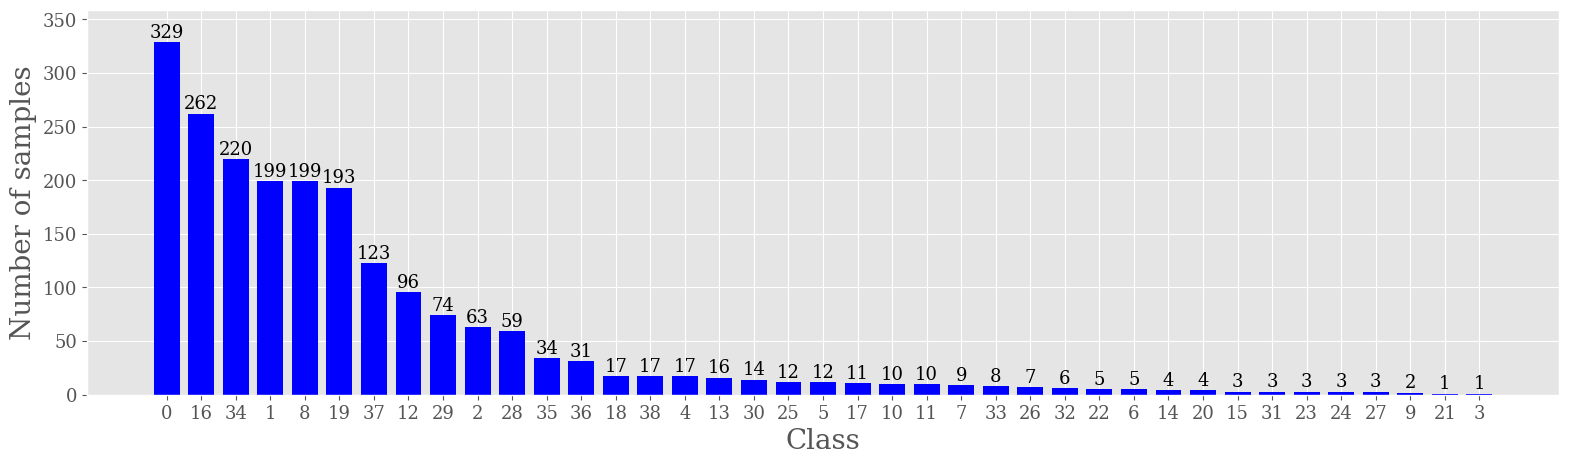

In [7]:
import matplotlib.pyplot as plt

# creating the dataset
count = np.unique(labels, return_counts = True)
argsorted = np.argsort(count[1])
x = np.flip(count[0][argsorted])
values = np.flip(count[1][argsorted])
#values_grouped = [sum(values[int(i*len(values)/10):int((i+1)*len(values)/10)]) for i in range(10)] 
#values_grouped = values_grouped/sum(values)*100

SMALL_SIZE = 13
MEDIUM_SIZE = 20

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize = (19, 5))

# creating the bar plot
bar_width = 0.75 
bars = plt.bar(x.astype(str), values, color ='blue',
        width = bar_width)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + (bar_width / 2), yval + 0.5, "%d" % (yval), horizontalalignment="center", verticalalignment="bottom")


plt.ylim(top = max(values+30))

plt.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = True)

plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# creating the dataset
count = np.unique(labels, return_counts = True)
argsorted = np.argsort(count[1])
x = count[0][argsorted]
values = count[1][argsorted]

# plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(x.astype(str), values, color ='blue',
        width = 0.75)
 
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


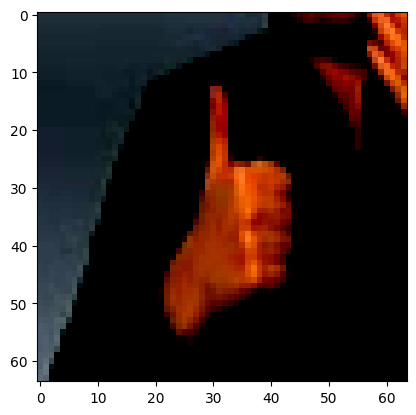

In [136]:
plt.imshow(np.transpose(train_dataset[1][0], (1,2,0)))
plt.show()

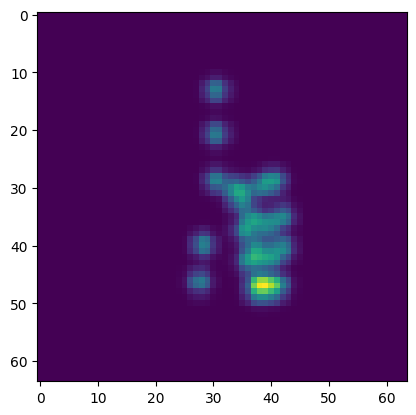

In [137]:
plt.imshow(np.sum(np.transpose(train_dataset[1][2].numpy(), (1,2,0)),2))
plt.show()
              

In [116]:
eval_dataset = Dataset_(data_name='hagrid',
                        data_dir='/mnt/sda2/datasets/static-sl/hagrid-complete/',
                        train=False,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path=None,
                        normalize=True,
                        load_data_in_memory=False,
                        pose=True,
                        skeleton=True)

/tmp/ipykernel_14782/2159401923.py:179: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  self.trsf_list += [transforms.Resize(resize_size, Image.LANCZOS)]
/home/grios/myphyton/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


64
64
(20, 64, 64)


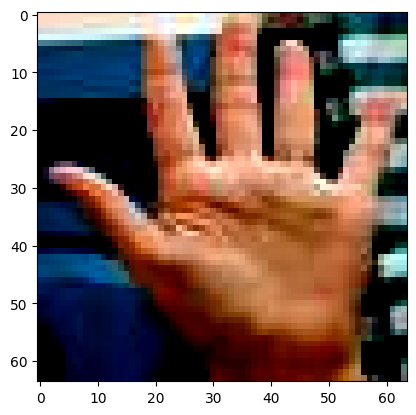

In [127]:
plt.imshow(np.transpose(eval_dataset[6][0], (1,2,0)))
plt.show()

64
64
(20, 64, 64)


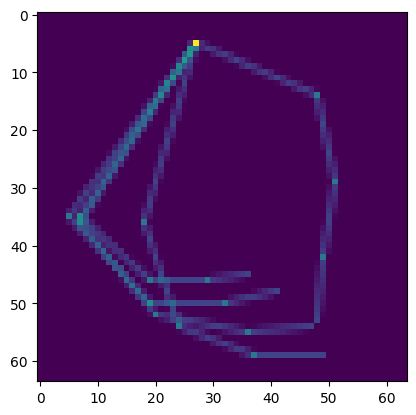

In [128]:
plt.imshow(np.sum(np.transpose(eval_dataset[6][2].numpy(), (1,2,0)),2))
plt.show()
              

In [23]:
train_dataset[8]              

IndexError: index 92 is out of bounds for axis 1 with size 92

In [4]:
rwth_dataset = Dataset_(data_name='rwth',
                        data_dir='/mnt/sda2/datasets/static-sl/rwth/',
                        train=True,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path=None,
                        normalize=True,
                        load_data_in_memory=True,
                        pose=False,
                        skeleton=False)

rwth_gen_dataset = Dataset_(data_name='rwth_gen',
                        data_dir='/mnt/sda2/datasets/generated/rwth-SPADE-train-2022_06_27_16_44_03/',
                        train=True,
                        crop_long_edge=True,
                        resize_size=64,
                        random_flip=False,
                        hdf5_path=None,
                        normalize=True,
                        load_data_in_memory=True,
                        pose=False,
                        skeleton=False)

/home/grios/myphyton/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [10]:
for i in range(len(rwth_gen_dataset)):
    if i != 52313:    
        try:
            rwth_gen_dataset[i]
        except:
            print(i) 

OSError: image file is truncated

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

x_a = cv2.resize(imread(os.path.join(real_d,"0","train0.png")), (64,64))
x_b = imread(os.path.join(fake_d,"10","20.png"))
plt.imshow(mixup_data(x_a, x_b)[0])
plt.show()

In [19]:
from matplotlib.image import imread
for class_dir in os.listdir('/mnt/sda2/datasets/generated/rwth-SPADE-train-2022_06_27_16_44_03/train/'):
    for img_dir in os.listdir(os.path.join('/mnt/sda2/datasets/generated/rwth-SPADE-train-2022_06_27_16_44_03/train/', class_dir)):
        try:
            imread(os.path.join('/mnt/sda2/datasets/generated/rwth-SPADE-train-2022_06_27_16_44_03/train/', class_dir, img_dir))
        except:
            print(os.path.join('/mnt/sda2/datasets/generated/rwth-SPADE-train-2022_06_27_16_44_03/train/', class_dir, img_dir))

In [12]:
from matplotlib.image import imread
import os
base_dir = '/mnt/sda2/datasets/generated/rwth-small-SPADE-train-2022_06_27_16_44_03/train/'
for class_dir in os.listdir(base_dir):
    for img_dir in os.listdir(os.path.join(base_dir, class_dir))[1000:]:
        os.remove(os.path.join(base_dir, class_dir,img_dir))
    print(len(os.listdir(os.path.join(base_dir, class_dir))))

1000
212
849
1000
1000
637
1000
1000
352
1000
564
1000
494


In [9]:
careal = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/real/rwth/class_accuracy.pkl')
cafake = pd.read_pickle(r'/mnt/sda2/models/TDG/classifier_results/gen/RWTH-ReACGAN/class_accuracy.pkl')

In [10]:
careal.values

<function dict.values>

In [11]:
np.array(labels)[sort]

NameError: name 'sort' is not defined

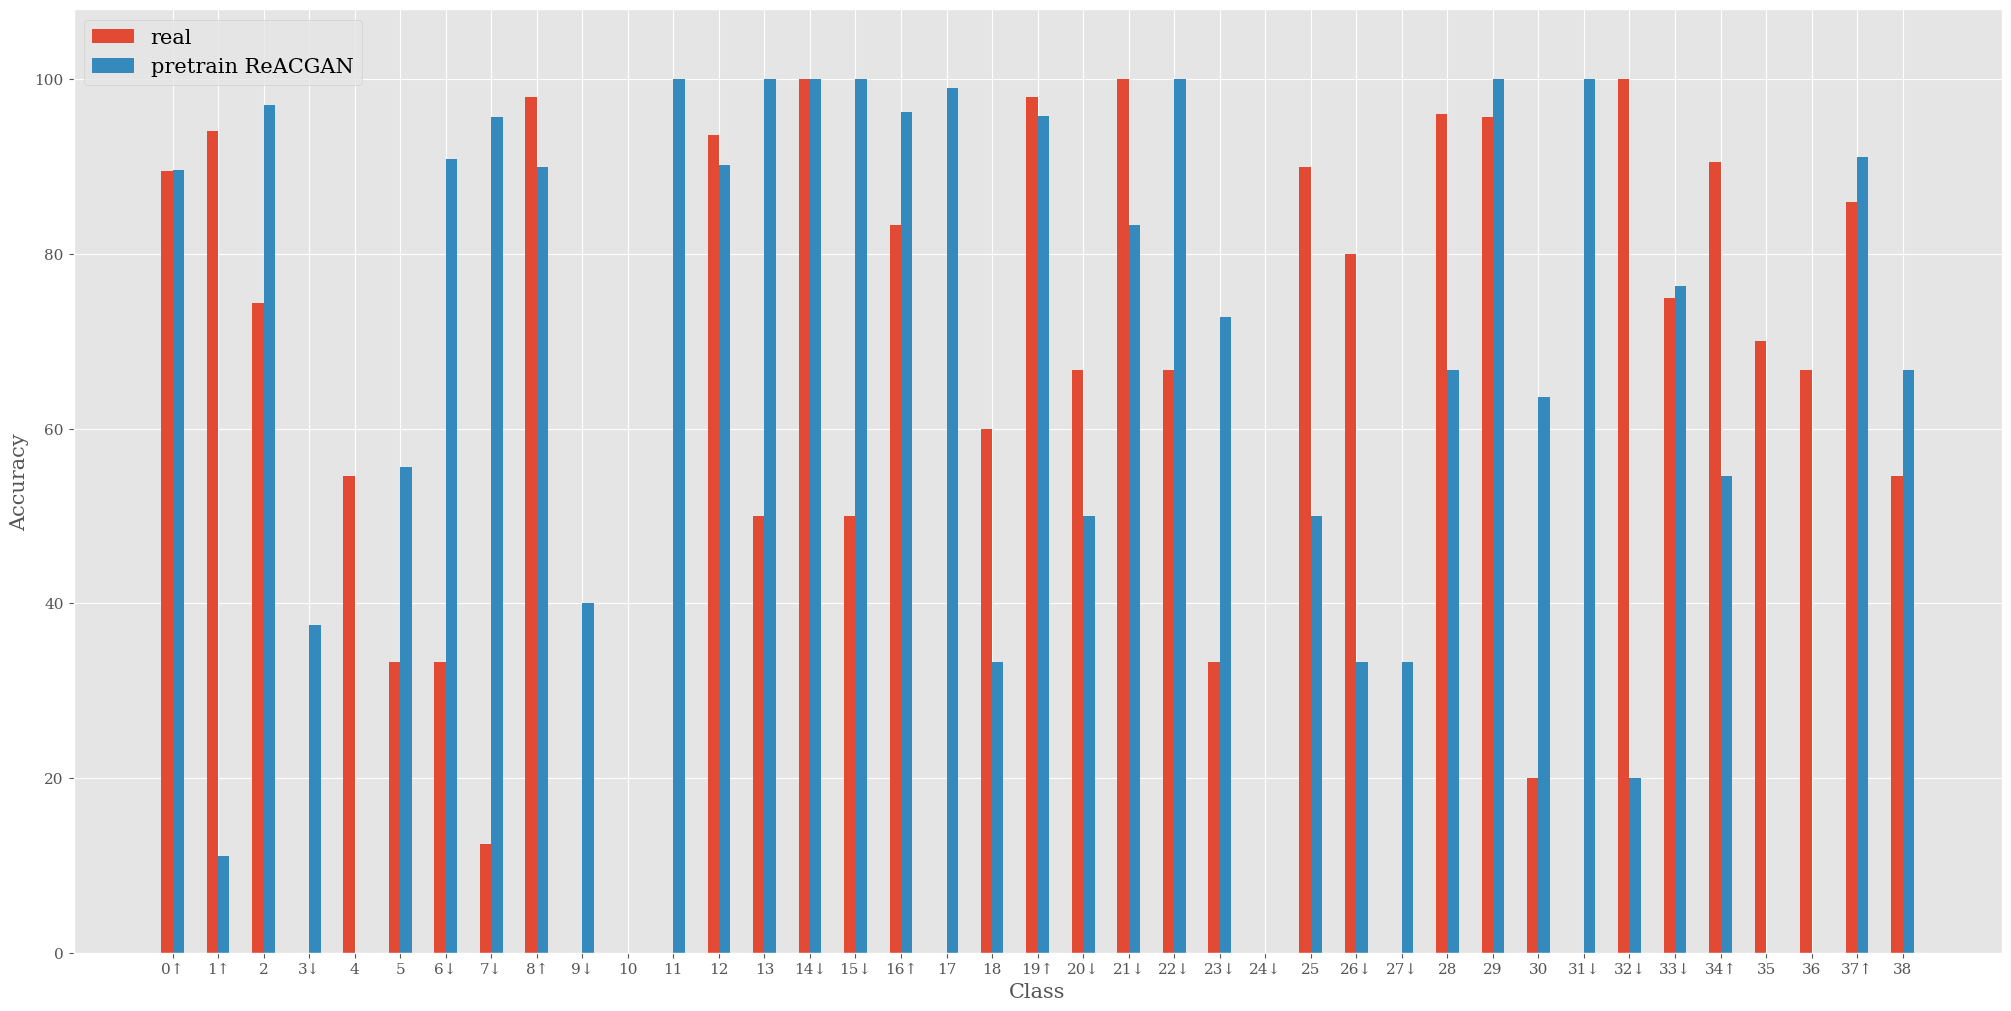

In [21]:
import matplotlib.pyplot as plt
import numpy as np

SMALL_SIZE = 11
MEDIUM_SIZE = 15

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

labels = np.array(list(careal.keys()))
sort = np.argsort(labels)
labels = labels[sort]
values_real = (np.array(list(careal.values()))*100)[sort]
values_gen = (np.array(list(cafake.values()))*100)[sort]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5
padding = 3

fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

offset = width * multiplier
rects = ax.bar(x + offset, values_real, width, label="real")
# ax.bar_label(rects, fmt='%.1f', padding=padding)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, values_gen, width, label="pretrain ReACGAN")
# ax.bar_label(rects, fmt='%.1f', padding=padding)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
label_display = []
count_max = 0
count_min = 0
for label in labels:
    if (count[1][np.argwhere(count[0]==label)]<10):
        label_display.append(str(label)+'↓')
        count_min+=1
    elif (count[1][np.argwhere(count[0]==label)]>100):
        label_display.append(str(label)+'↑')
        count_max+=1
    else:
        label_display.append(str(label))
ax.set_ylabel('Accuracy')
ax.set_xlabel('Class')
ax.set_xticks(x + width, label_display)
ax.legend(loc='upper left')
ax.set_ylim(0, 108)

plt.show()

In [26]:
count_max

7

In [27]:
count_min

16